In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [3]:

df = pd.read_csv("avilaa.txt")



In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10429 entries, 0 to 10428
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0.266074  10429 non-null  float64
 1   -0.16562  10429 non-null  float64
 2   0.32098   10429 non-null  float64
 3   0.483299  10429 non-null  float64
 4   0.17234   10429 non-null  float64
 5   0.273364  10429 non-null  float64
 6   0.371178  10429 non-null  float64
 7   0.929823  10429 non-null  float64
 8   0.251173  10429 non-null  float64
 9   0.159345  10429 non-null  float64
 10  A         10429 non-null  object 
dtypes: float64(10), object(1)
memory usage: 896.4+ KB


In [4]:
x=df.iloc[0:,:10]
y=df.iloc[0:,-1]
x.head()
type(y)
len(y)

10429

In [5]:
y.head

<bound method NDFrame.head of 0        A
1        A
2        A
3        F
4        A
        ..
10424    F
10425    F
10426    A
10427    E
10428    X
Name: A, Length: 10429, dtype: object>

In [6]:
encoder = {'A':1 ,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26}

for i in range(df.shape[0]):
    y[i]=encoder[y[i]]
y=y.astype(int)


In [7]:
def accuracy(X_train,y_train,X_test,y_test,params):
    print(params)
    co = SVC(kernel=params[0],C=params[1],gamma=params[2],degree=params[3])    
    co.fit(X_train,y_train)
    y_pred = co.predict(X_test)
    return accuracy_score(y_test,y_pred)


In [8]:
kernalList=[ 'linear','poly', 'rbf', 'sigmoid']
bestAccuracy = 0
cvgs_data = []
samples_collection = []



In [12]:


def sample(X,Y,iter=200):
    global bestAccuracy
    saccuracy = 0
    sgamma = 0     #  rbf,poly sig only
    skernel = ''
    sc =  0       
    sdegree = 0         # poly only
    scvgsdata = []
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    for _ in range(iter):
        kernel = r.choice(kernalList)
        c = r.randint(1,6)
        g = r.randint(-1,6)
        p = r.randint(1,7)
        if(g<1):
            g=r.choice(['scale','auto'])
        if(kernel == 'poly'):
            g=r.choice(['scale','auto'])
        
        acc = accuracy(X_train,y_train,X_test,y_test,[kernel,c,g,p])    

        print(acc)

        if(acc>saccuracy):
            saccuracy=acc
            sc=c
            sdegree=p
            skernel=kernel
            sgamma=g
        
        scvgsdata.append(saccuracy)

    samples_collection.append([skernel,sc,sgamma,sdegree,saccuracy])

    if(saccuracy>bestAccuracy):
            global cvgs_data
            cvgs_data = scvgsdata
            bestAccuracy=saccuracy


for _ in range(10):
    sample(x,y,20)



['sigmoid', 3, 'auto', 6]
0.3940556088207095
['linear', 5, 'scale', 6]
0.5794183445190156
['poly', 1, 'scale', 1]
0.5605624800255673
['sigmoid', 1, 'auto', 3]
0.4042825183764781
['rbf', 1, 'auto', 5]
0.6816874400767018
['linear', 6, 1, 6]
0.5781399808245445
['linear', 2, 'auto', 7]
0.5778203899009268
['rbf', 6, 6, 3]
0.642697347395334
['sigmoid', 7, 4, 4]
0.30201342281879195
['linear', 7, 4, 3]
0.5778203899009268
['rbf', 5, 6, 4]
0.6436561201661872
['poly', 6, 'auto', 1]
0.5752636625119847
['linear', 3, 3, 6]
0.5771812080536913
['sigmoid', 2, 1, 7]
0.3263023330137424
['sigmoid', 4, 3, 3]
0.3084052412911473
['linear', 6, 7, 1]
0.5781399808245445
['sigmoid', 3, 6, 7]
0.31383828699264943
['rbf', 7, 5, 2]
0.6692233940556088
['poly', 1, 'scale', 2]
0.5206136145733461
['linear', 4, 4, 4]
0.5778203899009268
['rbf', 7, 4, 5]
0.7101310322786832
['poly', 4, 'scale', 7]
0.5337168424416746
['poly', 5, 'auto', 2]
0.530520933205497
['sigmoid', 4, 'scale', 6]
0.4173857462448066
['sigmoid', 3, 6, 2]
0

In [10]:
all_samples = pd.DataFrame(samples_collection,columns=['Kernel','c','gamma','degree','Accuracy'])
print(all_samples)

  Kernel  c  gamma  degree  Accuracy
0    rbf  6   auto       5  0.725791
1    rbf  2      4       4  0.708853
2    rbf  4      1       6  0.770214
3    rbf  5      1       1  0.771492
4    rbf  3  scale       4  0.709492
5    rbf  3      3       5  0.706296
6    rbf  1      4       7  0.639182
7    rbf  4  scale       1  0.736977
8    rbf  5      2       6  0.735059
9    rbf  4      2       3  0.744966


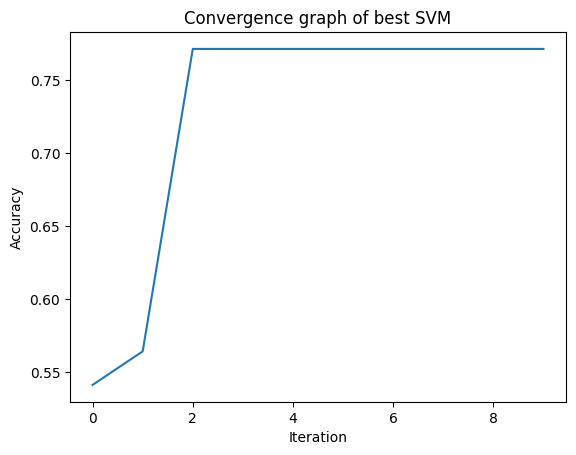

In [11]:
all_samples.to_csv('result.csv',index=False)
all_samples.to_markdown('result.md',index=False)

plt.plot(np.arange(len(cvgs_data)),cvgs_data)
plt.title('Convergence graph of best SVM')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()